In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [2]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.8,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [3]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [4]:
from bin.futils import load_fisher

In [5]:
so_base_fisher_files = ['../userdata/so/base/sum_so_base_abund_plus_planck.pkl',
                        '../userdata/so/base/sum_so_base_abund_plus_planck_clustering_abias.pkl',
                        '../userdata/so/base/sum_so_base_abund_plus_planck_clustering.pkl']

so_goal_fisher_files = ['../userdata/so/goal/sum_so_goal_abund_plus_planck.pkl',
                        '../userdata/so/goal/sum_so_goal_abund_plus_planck_clustering_abias.pkl',
                        '../userdata/so/goal/sum_so_goal_abund_plus_planck_clustering.pkl']

s4_fisher_files = ['../userdata/s4/sum_s4_abund_plus_planck.pkl',
                   '../userdata/s4/sum_s4_abund_plus_planck_clustering_abias.pkl',
                   '../userdata/s4/sum_s4_abund_plus_planck_clustering.pkl']

fisher_labels = ['Abundance+Planck',
                'Abundance+Planck+Clustering w/ bias uncert',
                'Abundance+Planck+Clustering']

colors = ['#2e7daa', 
          '#a80639', 
          '#f7d25b']

so_base_fisher_list = []
for file_ in so_base_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    so_base_fisher_list.append(fishmat)

so_goal_fisher_list = []
for file_ in so_goal_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    so_goal_fisher_list.append(fishmat)

s4_fisher_list = []
for file_ in s4_fisher_files:
    fishmat = load_fisher(file_)
    try:
        fishmat.delete('b_wl')
    except:
        print('b_wl not in this matrix')
    s4_fisher_list.append(fishmat)

b_wl not in this matrix
b_wl not in this matrix
b_wl not in this matrix


/Users/dylan/Development/szar/bin/futils.py:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fisher.params = fisher.columns.values.tolist()


In [6]:
so_base_fisher_barplot_list = []
for fish in so_base_fisher_list:
    fish_with_prior = fish.copy()
    fish_with_prior.add_prior('tau', 1e-2)
    so_base_fisher_barplot_list.append(fish_with_prior)
    
so_goal_fisher_barplot_list = []
for fish in so_goal_fisher_list:
    fish_with_prior = fish.copy()
    fish_with_prior.add_prior('tau', 1e-2)
    so_goal_fisher_barplot_list.append(fish_with_prior)
    
s4_fisher_barplot_list = []
for fish in s4_fisher_list:
    fish_with_prior = fish.copy()
    fish_with_prior.add_prior('tau', 1e-2)
    s4_fisher_barplot_list.append(fish_with_prior)

/Users/dylan/Development/orphics/orphics/stats.py:204: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [7]:
so_base_constraint_list = [fish.sigmas() for fish in so_base_fisher_barplot_list]
so_goal_constraint_list = [fish.sigmas() for fish in so_goal_fisher_barplot_list]
s4_constraint_list = [fish.sigmas() for fish in s4_fisher_barplot_list]

In [8]:
def _get_latex_params(inifile, fish_sect='fisher-clustering'):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items(fish_sect, 'paramLatexList')[1][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}

ordered_params = 'omch2,ombh2,H0,ns,As,mnu,w0,wa,alpha_ym,b_ym,beta_ym,gamma_ym,Ysig,gammaYsig,betaYsig'
ordered_params = ordered_params.split(',')
ordered_fisher = so_base_fisher_list[2].copy().reordered(ordered_params)
for index,key in enumerate(ordered_fisher.columns.values):
    latex_paramdict[key] = latex_params[index]

In [9]:
latex_paramdict

{'omch2': '\\Omega_ch^2',
 'ombh2': '\\Omega_bh^2',
 'H0': 'H_0',
 'ns': 'n_s',
 'As': 'A_s',
 'mnu': '\\Sigma m_{\\nu}',
 'w0': 'w',
 'wa': 'w_a',
 'alpha_ym': '\\alpha_y',
 'b_ym': '\\beta_y',
 'beta_ym': '\\gamma_Y',
 'gamma_ym': '\\sigma_{\\mathrm{log}Y}',
 'Ysig': '\\gamma_Y',
 'gammaYsig': '\\beta_{\\sigma}',
 'betaYsig': 'b'}

In [10]:
params_to_plot = ['H0', 'mnu', 'ombh2', 'w0', 'wa']
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [11]:
import pandas as pd

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz

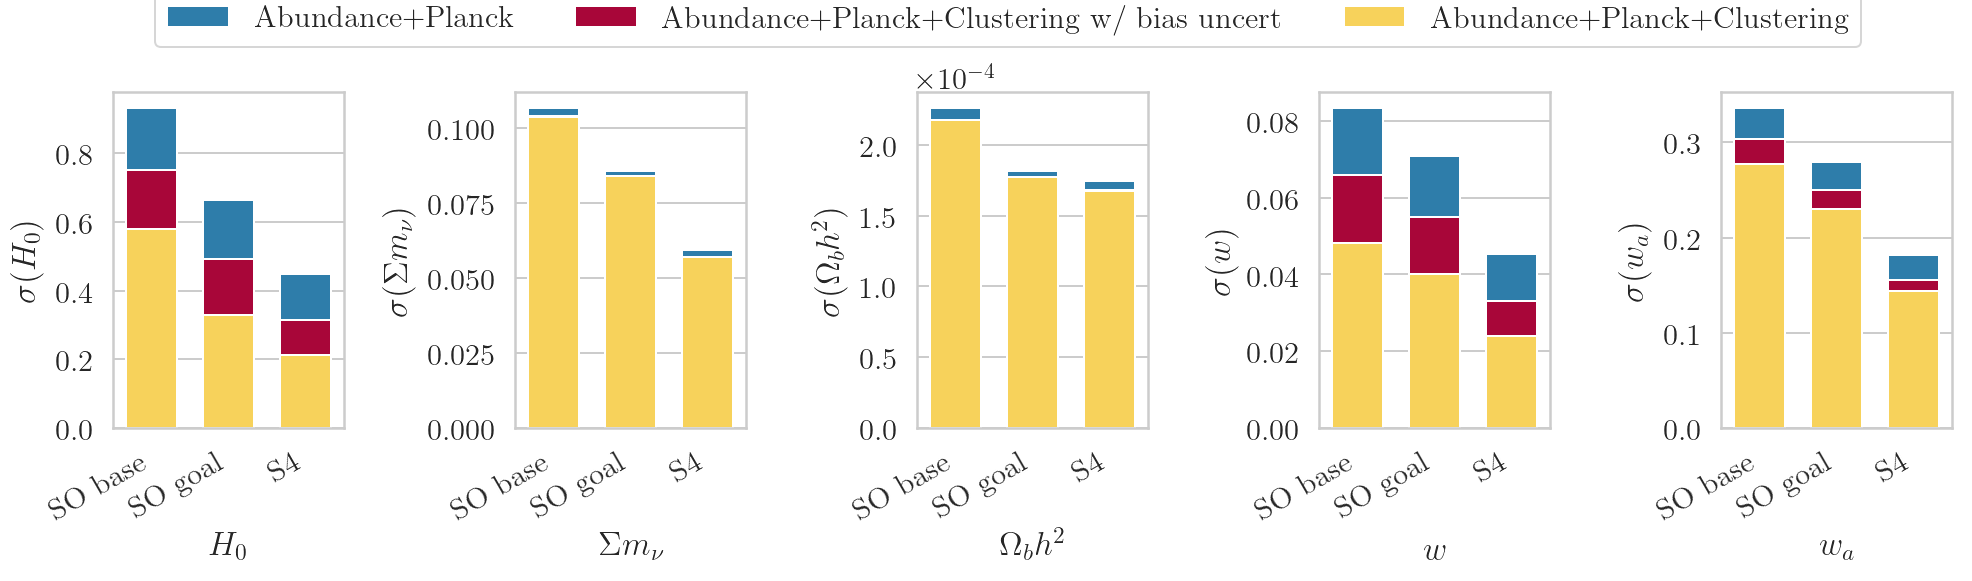

In [12]:
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(14, 4))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    wth = 1
    #sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    
    for fish_index in range(len(so_base_fisher_list)):
        axes[index].bar(0, so_base_constraint_list[fish_index][param], width=wth, 
                        label=fisher_labels[fish_index], color=colors[fish_index])
        
    for fish_index in range(len(so_goal_fisher_list)):
        axes[index].bar(1.5, so_goal_constraint_list[fish_index][param], width=wth, 
                        color=colors[fish_index])
                    
    for fish_index in range(len(s4_fisher_list)):
        axes[index].bar(3, s4_constraint_list[fish_index][param], width=wth, 
                        color=colors[fish_index])
        
    axes[index].set_xlabel(latex)
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5,3.0))
    axes[index].set_xticklabels(('SO base', 'SO goal', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 3 +(wth + wth/2)/2)
    axes[index].set_ylabel(r'$\sigma ('+latex_paramdict[param]+')$')
    axes[index].grid(False, axis='x')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.autofmt_xdate()
fig.tight_layout()
#fig.savefig('barplot.eps', bbox_inches='tight')

In [13]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+'/bin') 
from deeos_to_gamma import get_gamma_constraint

In [14]:
so_base_sigma_gammas = []
for fish in so_base_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    so_base_sigma_gammas.append(sig_gamma)
    
so_goal_sigma_gammas = []
for fish in so_goal_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    so_goal_sigma_gammas.append(sig_gamma)
    
s4_sigma_gammas = []
for fish in s4_fisher_barplot_list:
    sig_gamma = get_gamma_constraint(fish, fish.columns.values)
    s4_sigma_gammas.append(sig_gamma)

/Users/dylan/Development/orphics/orphics/stats.py:204: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


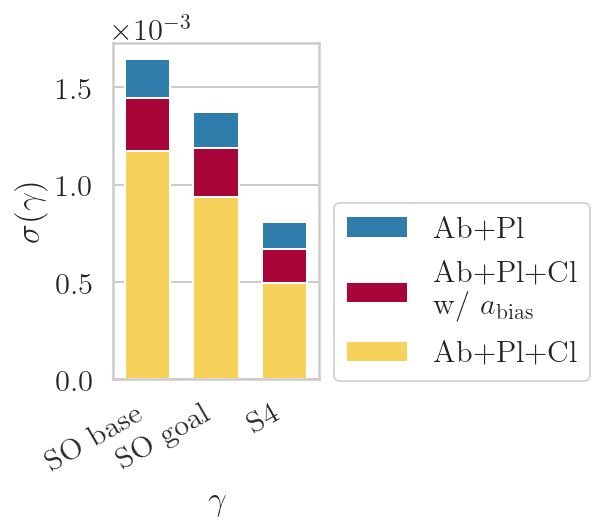

In [15]:
gamma_labels = ['Ab+Pl',
                'Ab+Pl+Cl'+'\n'+r'w/ $a_{\mathrm{bias}}$',
                'Ab+Pl+Cl']
wth = 1
for index,sigma_gamma in enumerate(so_base_sigma_gammas):
    plt.bar(0, sigma_gamma, width=1, label=gamma_labels[index],
            color=colors[index])
    
for index,sigma_gamma in enumerate(so_goal_sigma_gammas):
    plt.bar(1.5, sigma_gamma, width=1,
            color=colors[index])
    
for index,sigma_gamma in enumerate(s4_sigma_gammas):
    plt.bar(3, sigma_gamma, width=1,
            color=colors[index])
    
plt.xlabel(r'$\gamma$')
plt.xlim(-(wth + wth/2)/2 , 3 + (wth + wth/2)/2)
plt.ylabel(r'$\sigma(\gamma)$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.26))
plt.grid(False, axis='x')
plt.xticks([0,1.5,3.0], ['SO base', 'SO goal', 'S4'])

fig = plt.gcf()
fig.autofmt_xdate()
fig.set_size_inches(4.5,4)
fig.tight_layout()
#fig.savefig('gamma_barplot.eps', bbox_inches='tight')

In [16]:
from orphics.io import dict_from_section,list_from_config
Config = ConfigParser()
Config.optionxform=str
Config.read(INI)
clttfile = Config.get('general','clttfile')
constDict = dict_from_section(Config,'constants')

fparams = {}
for (key, val) in Config.items('params'):
    if ',' in val:
        param, step = val.split(',')
        fparams[key] = float(param)
    else:
        fparams[key] = float(val)

In [17]:
params_to_corner_plot = ['H0', 'ombh2', 'omch2', 'ns', 'mnu', 'w0', 'wa']
latex_to_corner_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_corner_plot]
latex_dict_corner={}
for ind,key in enumerate(params_to_corner_plot):
    latex_dict_corner[key] = latex_to_corner_plot[ind]

In [18]:
from orphics.stats import corner_plot

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Saved plot to paper_cornerplot_all.pdf


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


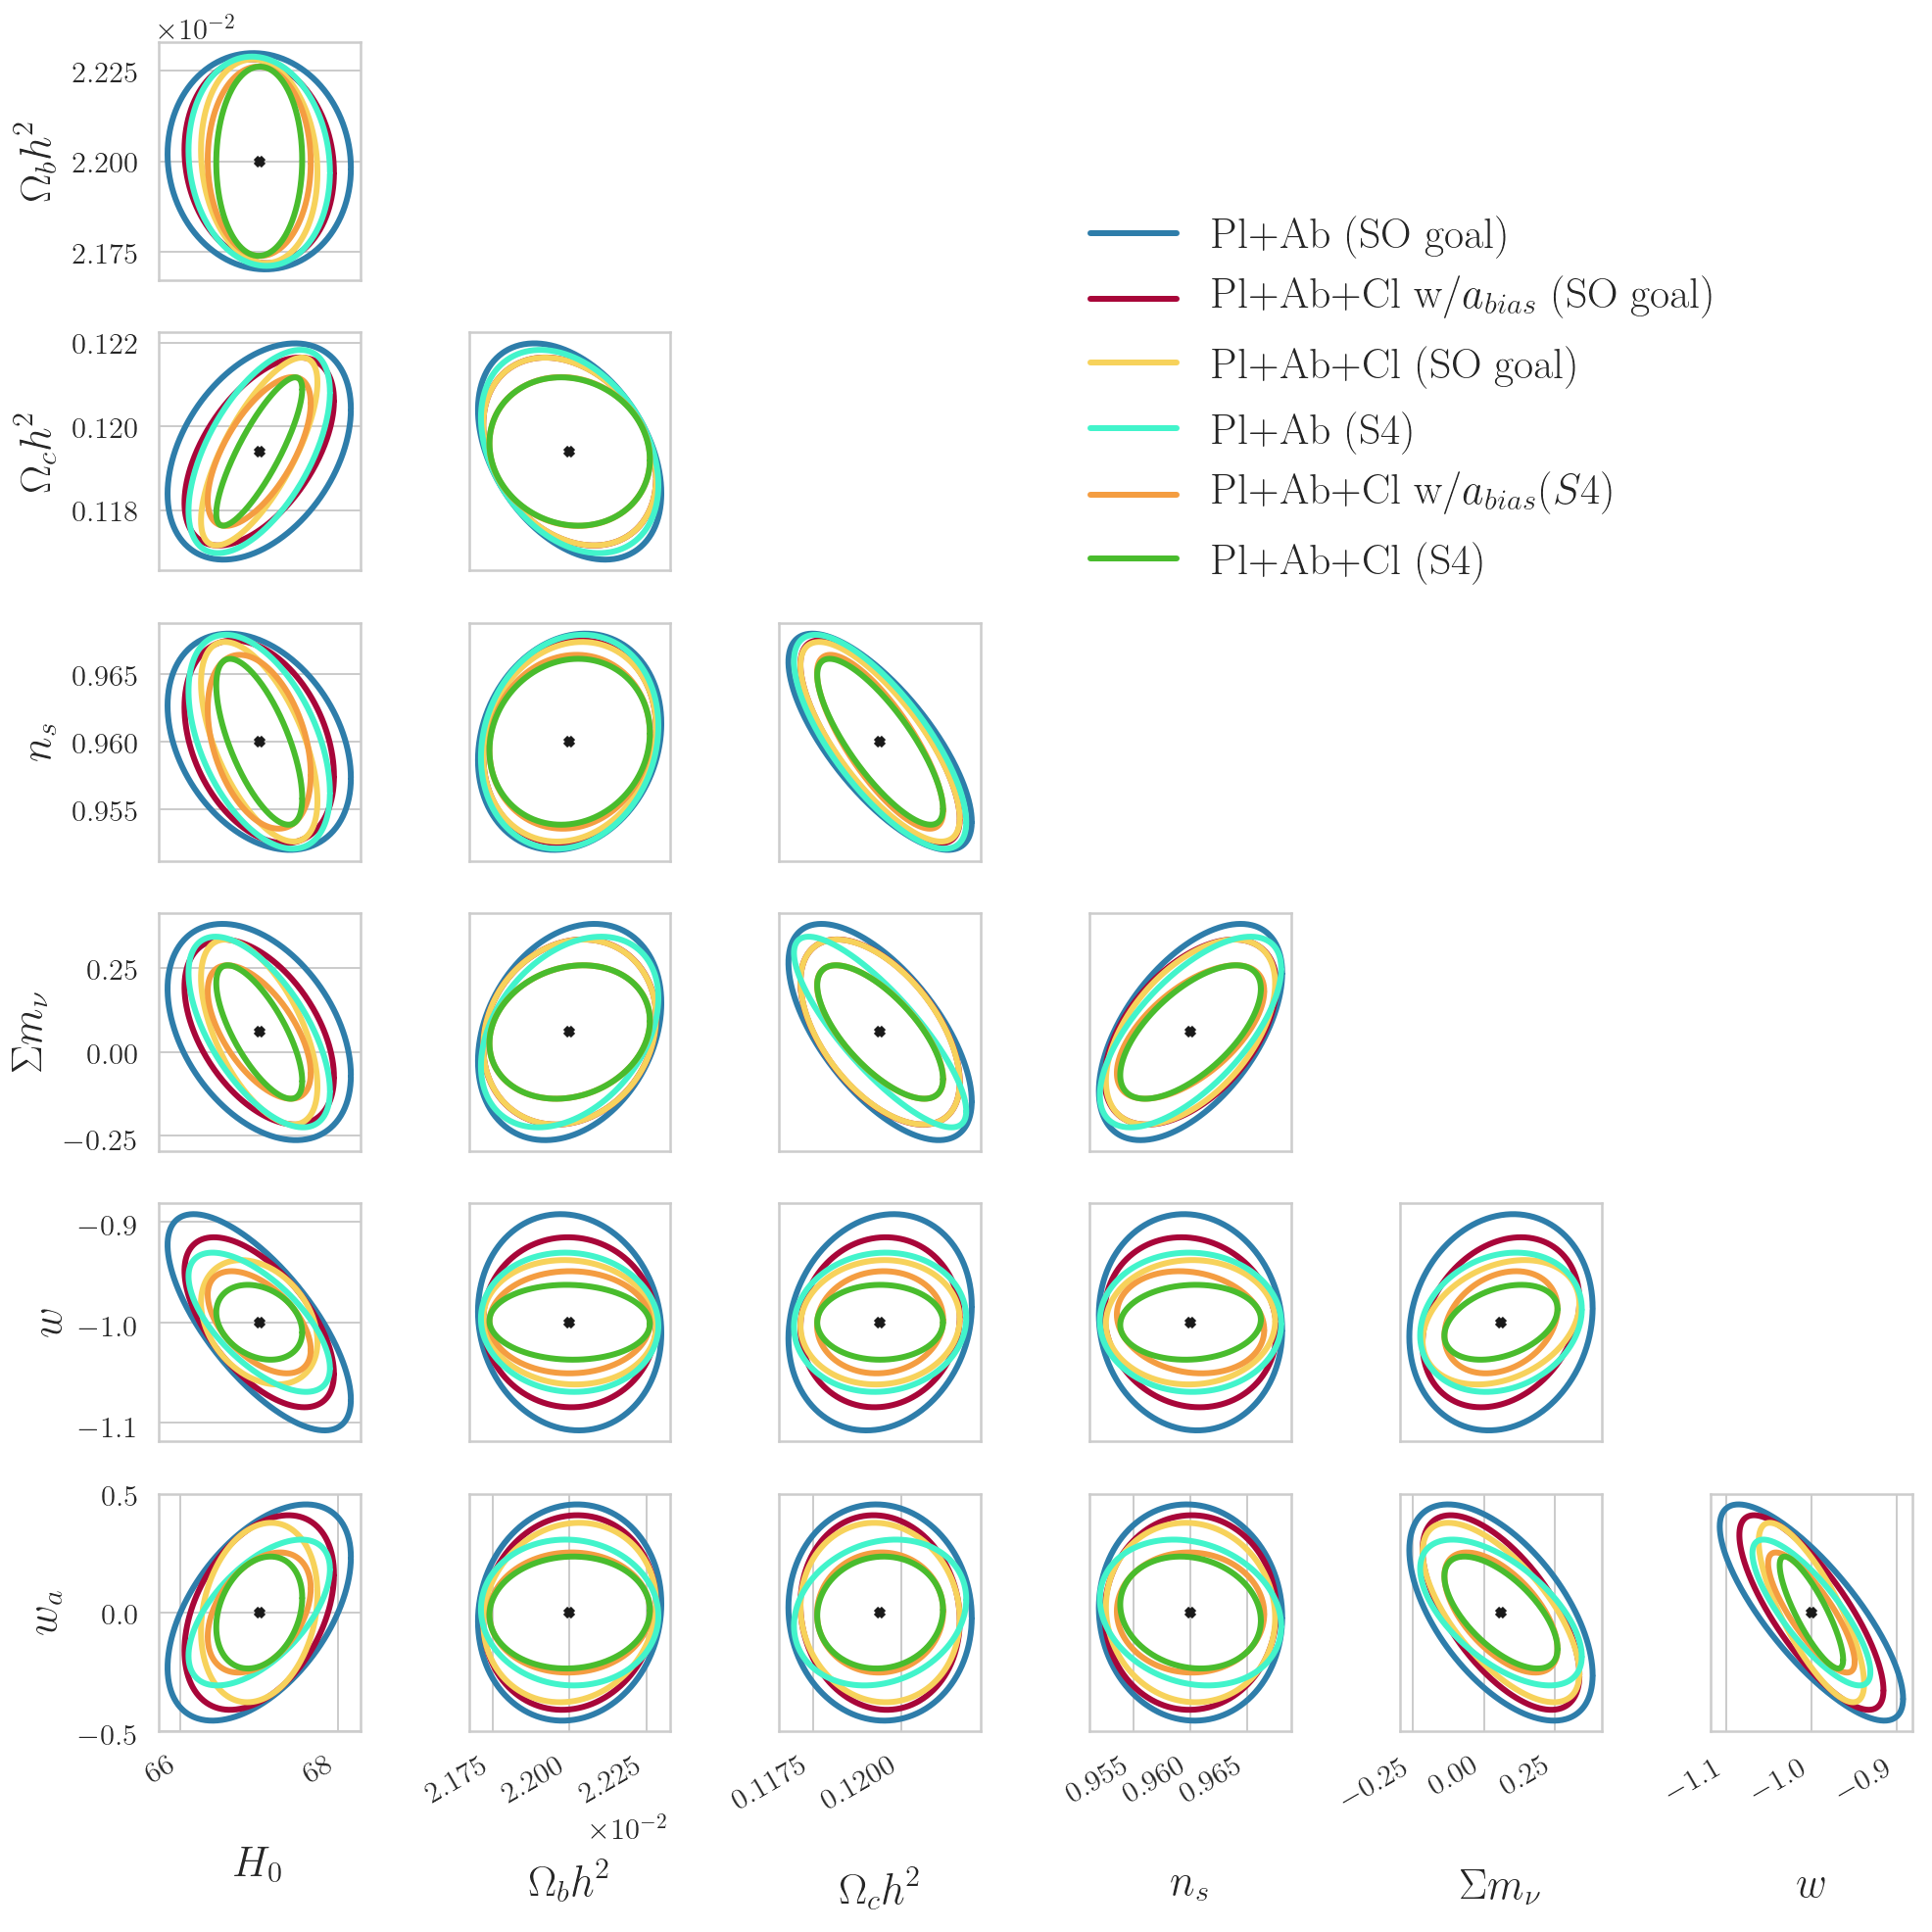

In [19]:
fishers_to_plot = so_goal_fisher_list + s4_fisher_list
corner_labels = ['Pl+Ab (SO goal)', r'Pl+Ab+Cl w/$a_{bias}$ (SO goal)', 'Pl+Ab+Cl (SO goal)',
                 'Pl+Ab (S4)', r'Pl+Ab+Cl w/$a_{bias} (S4)$', 'Pl+Ab+Cl (S4)']
corner_colors = ['#2e7daa','#a80639','#f7d25b', '#42f4cb', '#f49d41', '#49bc2d']
corner_plot(fishers_to_plot, corner_labels, colors=corner_colors, fid_dict=fparams, 
            params=params_to_corner_plot,
            show_1d=False, loc='upper right', latex_dict=latex_dict_corner, thk=3,
            labelsize=22, rotate_xlabels=True, xpad=30, save_file='paper_cornerplot_all.pdf',
            fileformat='pdf') 

In [20]:
def sigma_of_tau_prior(fisher, param, sigmatau):
    fisher_with_tau = fisher.copy()
    fisher_with_tau.add_prior('tau', sigmatau)
    sigma = fisher_with_tau.sigmas()[param]
    return sigma

In [21]:
sigma_taus = np.array([1e-3,1e-2])

so_base_mnus = []
for fish in so_base_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_mnus = np.array([sigma_of_tau(st) for st in sigma_taus])
    
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    so_base_mnus.append([sigma_mnus, sigma_mnus_no_w, sigma_mnus_no_ww])
    
so_base_mnus = np.array(so_base_mnus)
    
so_goal_mnus = []
for fish in so_goal_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_mnus = np.array([sigma_of_tau(st) for st in sigma_taus])
        
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    so_goal_mnus.append([sigma_mnus, sigma_mnus_no_w, sigma_mnus_no_ww])

so_goal_mnus = np.array(so_goal_mnus)
    
s4_mnus = []
for fish in s4_fisher_list:
    sigma_of_tau = lambda sigmatau: sigma_of_tau_prior(fish, 'mnu', sigmatau)
    sigma_mnus = np.array([sigma_of_tau(st) for st in sigma_taus])
    
    fish_no_w = fish.copy()
    #fish_no_w.delete('w0')
    fish_no_w.delete('wa')
    sigma_of_tau_no_w = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_w = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    fish_no_w.delete('w0')
    sigma_of_tau_no_ww = lambda sigmatau: sigma_of_tau_prior(fish_no_w, 'mnu', sigmatau)
    sigma_mnus_no_ww = np.array([sigma_of_tau_no_w(st) for st in sigma_taus])
    
    s4_mnus.append([sigma_mnus, sigma_mnus_no_w, sigma_mnus_no_ww])
    
s4_mnus = np.array(s4_mnus)

/Users/dylan/Development/orphics/orphics/stats.py:204: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [22]:
tab_columns = ['all', 'w0 + mnu', 'mnu only']
tab_rows = ['Pl+Ab', 'Pl+Ab+Cl (bias var)', 'Pl+Ab+Cl']

In [23]:
so_base_mnus_tau_1e6 = so_base_mnus[:,:,0]
so_base_mnus_tau_1e4 = so_base_mnus[:,:,1]

so_goal_mnus_tau_1e6 = so_goal_mnus[:,:,0]
so_goal_mnus_tau_1e4 = so_goal_mnus[:,:,1]

s4_mnus_tau_1e6 = s4_mnus[:,:,0]
s4_mnus_tau_1e4 = s4_mnus[:,:,1]

In [24]:
so_base_mnus_tau_1e6 = pd.DataFrame(so_base_mnus_tau_1e6, columns=tab_columns, index=tab_rows)
so_base_mnus_tau_1e4 = pd.DataFrame(so_base_mnus_tau_1e4, columns=tab_columns, index=tab_rows)

so_goal_mnus_tau_1e6 = pd.DataFrame(so_goal_mnus_tau_1e6, columns=tab_columns, index=tab_rows)
so_goal_mnus_tau_1e4 = pd.DataFrame(so_goal_mnus_tau_1e4, columns=tab_columns, index=tab_rows)

s4_mnus_tau_1e6 = pd.DataFrame(s4_mnus_tau_1e6, columns=tab_columns, index=tab_rows)
s4_mnus_tau_1e4 = pd.DataFrame(s4_mnus_tau_1e4, columns=tab_columns, index=tab_rows)

In [25]:
so_base_mnus_tau_1e4

,all,w0 + mnu,mnu only
Pl+Ab,0.106614,0.094900,0.070135
Pl+Ab+Cl (bias var),0.104120,0.087992,0.068108
Pl+Ab+Cl,0.103797,0.081299,0.068029


In [26]:
def fom(fisher, fom_params):
    fisher_params = fisher.params
    cov = FisherMatrix(np.linalg.inv(fisher.values), fisher_params)
    
    excluded_params = set(fisher_params) - set(fom_params)
    for par in excluded_params:
        cov.delete(par)
        
    return 1/np.sqrt(np.linalg.det(cov.values))
    

In [27]:
fom1 = fom(s4_fisher_barplot_list[0], ['mnu', 'w0', 'wa'])
fom2 = fom(s4_fisher_barplot_list[1], ['mnu', 'w0', 'wa'])
fom3 = fom(s4_fisher_barplot_list[2], ['mnu', 'w0', 'wa'])

print(fom2/fom1)
print(fom3/fom1)

1.531809099890607
2.413345100504025


In [29]:
nuis_params = ['b_ym', 'alpha_ym', 'Ysig', 'gamma_ym', 'beta_ym', 'gammaYsig', 'betaYsig']
nuis1 = fom(s4_fisher_barplot_list[0], nuis_params)
nuis2 = fom(s4_fisher_barplot_list[1], nuis_params)
nuis3 = fom(s4_fisher_barplot_list[2], nuis_params)

print(nuis2/nuis1)
print(nuis3/nuis1)

1.5990619906923917
2.7559397306788473


In [41]:
extension_params = ['mnu', 'w0', 'wa']
nuissance_params = ['b_ym', 'alpha_ym', 'Ysig', 'gamma_ym', 'beta_ym', 'gammaYsig', 'betaYsig']
cosmo_params = ['H0', 'omch2', 'ombh2', 'As', 'ns']

so_base_extension_foms = [fom(fish, extension_params) for fish in so_base_fisher_barplot_list]
so_goal_extension_foms = [fom(fish, extension_params) for fish in so_goal_fisher_barplot_list]
s4_extension_foms = [fom(fish, extension_params) for fish in s4_fisher_barplot_list]

so_base_nuissance_foms = [fom(fish, nuissance_params) for fish in so_base_fisher_barplot_list]
so_goal_nuissance_foms = [fom(fish, nuissance_params) for fish in so_goal_fisher_barplot_list]
s4_nuissance_foms = [fom(fish, nuissance_params) for fish in s4_fisher_barplot_list]

so_base_cosmo_foms = [fom(fish, cosmo_params) for fish in so_base_fisher_barplot_list]
so_goal_cosmo_foms = [fom(fish, cosmo_params) for fish in so_goal_fisher_barplot_list]
s4_cosmo_foms = [fom(fish, cosmo_params) for fish in s4_fisher_barplot_list]

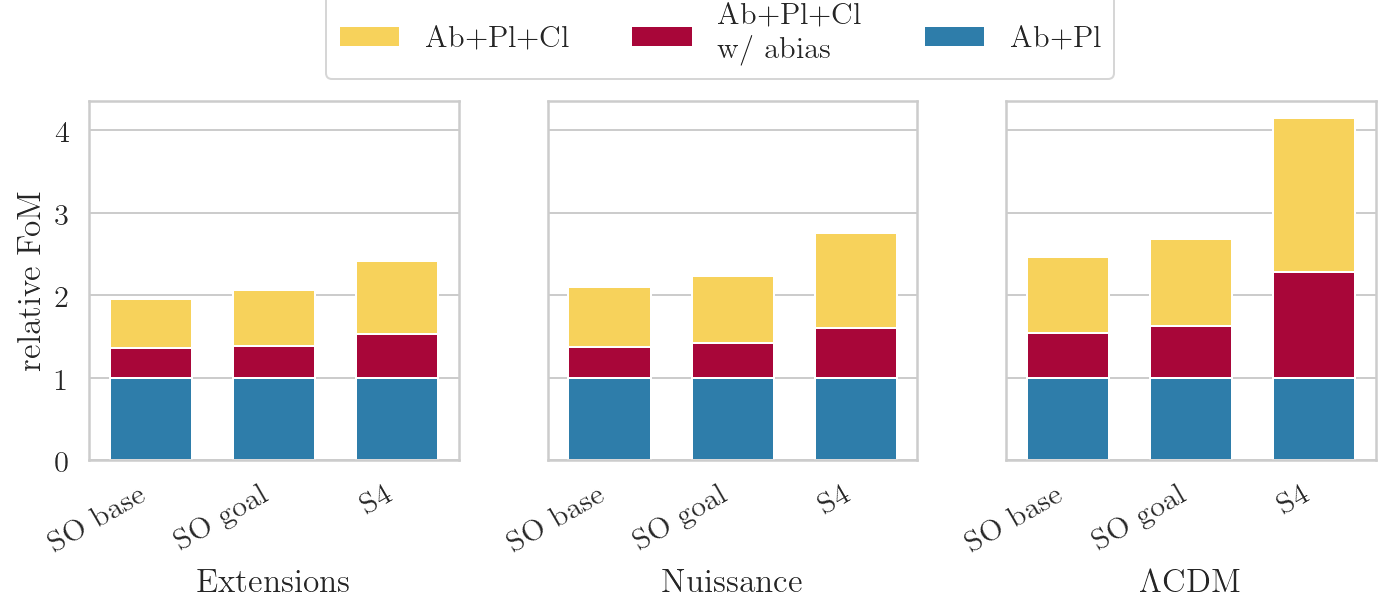

In [42]:
fig,axes = plt.subplots(1, 3, sharey=True)

#EXTENSIONS
so_base_ext_ratio_abias = so_base_extension_foms[1]/so_base_extension_foms[0]
so_base_ext_ratio = so_base_extension_foms[2]/so_base_extension_foms[0]
axes[0].bar(0, so_base_ext_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[0].bar(0, so_base_ext_ratio_abias, width=wth, color=colors[1], label='Ab+Pl+Cl \n w/ abias')
axes[0].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_ext_ratio_abias = so_goal_extension_foms[1]/so_goal_extension_foms[0]
so_goal_ext_ratio = so_goal_extension_foms[2]/so_goal_extension_foms[0]
axes[0].bar(1.5, so_goal_ext_ratio, width=wth, color=colors[2])
axes[0].bar(1.5, so_goal_ext_ratio_abias, width=wth, color=colors[1])
axes[0].bar(1.5, 1, width=wth, color=colors[0])

s4_ext_ratio_abias = s4_extension_foms[1]/s4_extension_foms[0]
s4_ext_ratio = s4_extension_foms[2]/s4_extension_foms[0]
axes[0].bar(3, s4_ext_ratio, width=wth, color=colors[2])
axes[0].bar(3, s4_ext_ratio_abias, width=wth, color=colors[1])
axes[0].bar(3, 1, width=wth, color=colors[0])

axes[0].set_ylabel(r'relative FoM')

#NUISSANCE
so_base_nuis_ratio_abias = so_base_nuissance_foms[1]/so_base_nuissance_foms[0]
so_base_nuis_ratio = so_base_nuissance_foms[2]/so_base_nuissance_foms[0]
axes[1].bar(0, so_base_nuis_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[1].bar(0, so_base_nuis_ratio_abias, width=wth, color=colors[1], label='Ab+Pl+Cl \n w/ abias')
axes[1].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_nuis_ratio_abias = so_goal_nuissance_foms[1]/so_goal_nuissance_foms[0]
so_goal_nuis_ratio = so_goal_nuissance_foms[2]/so_goal_nuissance_foms[0]
axes[1].bar(1.5, so_goal_nuis_ratio, width=wth, color=colors[2])
axes[1].bar(1.5, so_goal_nuis_ratio_abias, width=wth, color=colors[1])
axes[1].bar(1.5, 1, width=wth, color=colors[0])

s4_nuis_ratio_abias = s4_nuissance_foms[1]/s4_nuissance_foms[0]
s4_nuis_ratio = s4_nuissance_foms[2]/s4_nuissance_foms[0]
axes[1].bar(3, s4_nuis_ratio, width=wth, color=colors[2])
axes[1].bar(3, s4_nuis_ratio_abias, width=wth, color=colors[1])
axes[1].bar(3, 1, width=wth, color=colors[0])

#COSMOLOGICAL
so_base_cos_ratio_abias = so_base_cosmo_foms[1]/so_base_cosmo_foms[0]
so_base_cos_ratio = so_base_cosmo_foms[2]/so_base_cosmo_foms[0]
axes[2].bar(0, so_base_cos_ratio, width=wth, color=colors[2], label='Ab+Pl+Cl')
axes[2].bar(0, so_base_cos_ratio_abias, width=wth, color=colors[1], label='Ab+Pl+Cl \n w/ abias')
axes[2].bar(0, 1, width=wth, color=colors[0], label='Ab+Pl')

so_goal_cos_ratio_abias = so_goal_cosmo_foms[1]/so_goal_cosmo_foms[0]
so_goal_cos_ratio = so_goal_cosmo_foms[2]/so_goal_cosmo_foms[0]
axes[2].bar(1.5, so_goal_cos_ratio, width=wth, color=colors[2])
axes[2].bar(1.5, so_goal_cos_ratio_abias, width=wth, color=colors[1])
axes[2].bar(1.5, 1, width=wth, color=colors[0])

s4_cos_ratio_abias = s4_cosmo_foms[1]/s4_cosmo_foms[0]
s4_cos_ratio = s4_cosmo_foms[2]/s4_cosmo_foms[0]
axes[2].bar(3, s4_cos_ratio, width=wth, color=colors[2])
axes[2].bar(3, s4_cos_ratio_abias, width=wth, color=colors[1])
axes[2].bar(3, 1, width=wth, color=colors[0])

fom_labels = [r'Extensions', 'Nuissance', r'$\Lambda$CDM']
for index in range(3):
    axes[index].set_xlabel(fom_labels[index])
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5,3.0))
    axes[index].set_xticklabels(('SO base', 'SO goal', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 3 +(wth + wth/2)/2)
    axes[index].grid(False, axis='x')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9), ncol=3)
fig.autofmt_xdate()
fig.set_size_inches(10,4)
fig.tight_layout()